<a href="https://colab.research.google.com/github/taraudani/finalproj/blob/main/Initial_graphs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Data:**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D

In [2]:
aclr_orig = pd.read_csv('aclr_data.csv')

In [3]:
col_list = ['record_id', 'sex_dashboard', 'age', 'age_group', 'tss', 'tss_dashboard', 'ikdc', 'acl_rsi']
lsi_list = [col for col in aclr_orig.columns if 'lsi' in col and '_l' not in col]
final_list = col_list + lsi_list
aclr_used = aclr_orig[final_list]

In [4]:
aclr = aclr_used[final_list].copy()
aclr['sex_dashboard'] = aclr.groupby('record_id')['sex_dashboard'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))
aclr['age_group'] = aclr.groupby('record_id')['age_group'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))

/var/folders/b8/r68hsh0x1hq2tqrgwscmbdsc0000gn/T/ipykernel_27677/4209322551.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  aclr['sex_dashboard'] = aclr.groupby('record_id')['sex_dashboard'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))
/var/folders/b8/r68hsh0x1hq2tqrgwscmbdsc0000gn/T/ipykernel_27677/4209322551.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  aclr['sex_dashboard'] = aclr.groupby('record_id')['sex_dashboard'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))
/var/folders/b8/r68hsh0x1hq2tqrgwscmbdsc0000gn/T/ipykernel_27677/4209322551.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a futu

In [7]:
aclr['age_group'] = aclr['age_group'].astype('category')

In [8]:
aclr.head()

,record_id,sex_dashboard,age,age_group,tss,tss_dashboard,ikdc,acl_rsi,lsi_ext_mvic_90,lsi_ext_mvic_60,lsi_flex_mvic_60,lsi_ext_isok_60,lsi_flex_isok_60
0,1,Male,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Male,21.7,5.0,13.7,13 to 24 months,95.4,87.5,92.73,NaN,NaN,87.86,103.32
2,1,Male,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2,Female,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,Female,14.5,2.0,7.6,5 to 7 months,79.3,8.3,NaN,NaN,NaN,45.00,72.98


## **Graphs:**

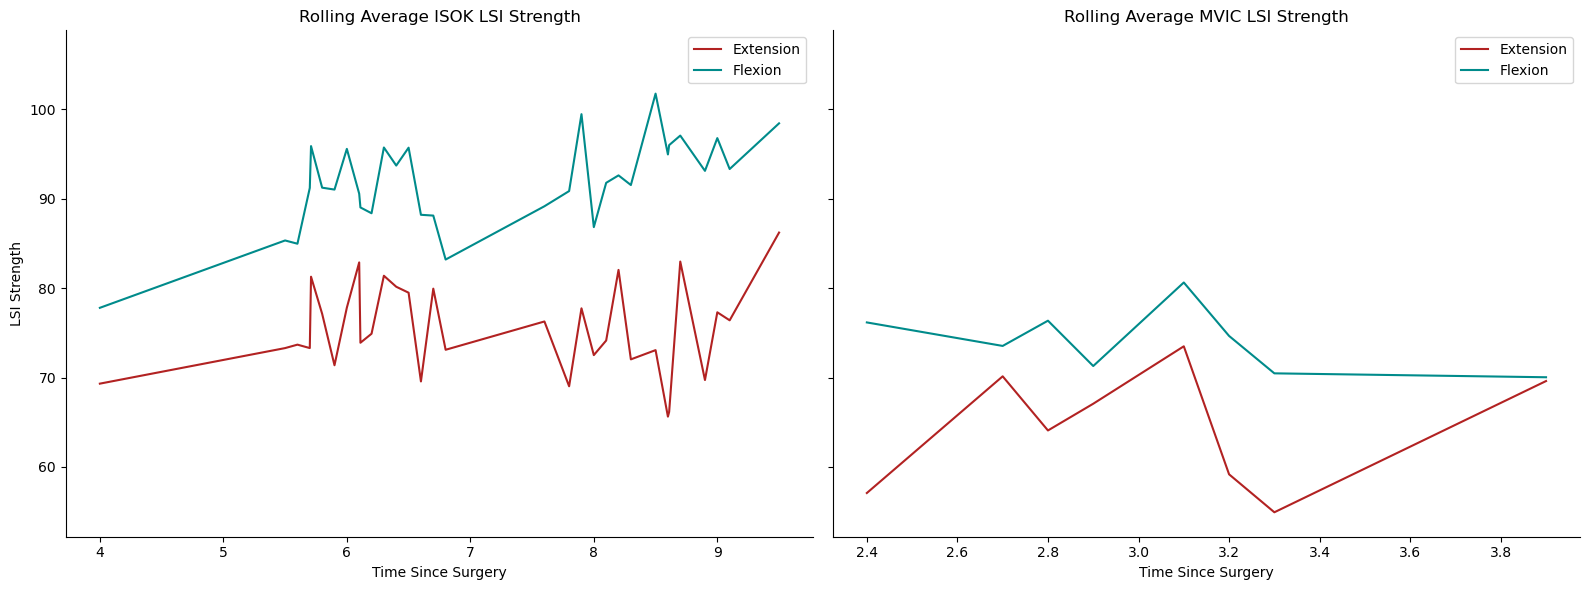

In [9]:
aclr = aclr.sort_values('tss')

aclr['ext_rolling'] = aclr['lsi_ext_isok_60'].rolling(window=12).mean()
aclr['flex_rolling'] = aclr['lsi_flex_isok_60'].rolling(window=12).mean()
aclr['ext_rolling_m'] = aclr['lsi_ext_mvic_60'].rolling(window=8).mean()
aclr['flex_rolling_m'] = aclr['lsi_flex_mvic_60'].rolling(window=8).mean()

all_vals = pd.concat([
    aclr['ext_rolling'], aclr['flex_rolling'],
    aclr['ext_rolling_m'], aclr['flex_rolling_m']
])
ymin, ymax = all_vals.min(), all_vals.max()

fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

sns.lineplot(ax=axes[0], data=aclr, x='tss', y='ext_rolling', color='firebrick', label='Extension', errorbar=None)
sns.lineplot(ax=axes[0], data=aclr, x='tss', y='flex_rolling', color='darkcyan', label='Flexion', errorbar=None)
axes[0].set_title('Rolling Average ISOK LSI Strength')
axes[0].set_xlabel('Time Since Surgery')
axes[0].set_ylabel('LSI Strength')
axes[0].set_ylim(ymin, ymax)
axes[0].legend()
sns.despine(ax=axes[0])

sns.lineplot(ax=axes[1], data=aclr, x='tss', y='ext_rolling_m', color='firebrick', label='Extension', errorbar=None)
sns.lineplot(ax=axes[1], data=aclr, x='tss', y='flex_rolling_m', color='darkcyan', label='Flexion', errorbar=None)
axes[1].set_title('Rolling Average MVIC LSI Strength')
axes[1].set_xlabel('Time Since Surgery')
axes[1].set_ylim(ymin, ymax)
axes[1].legend()
sns.despine(ax=axes[1])

plt.tight_layout()
plt.show()

In [20]:
acl_grouped = aclr.groupby('tss_dashboard').agg(
    mean_ext_mvic=('lsi_ext_mvic_90', 'mean'),
    mean_ext_mvic_60=('lsi_ext_mvic_60', 'mean'),
    mean_flex_mvic=('lsi_flex_mvic_60', 'mean'),
    mean_ext_isok=('lsi_ext_isok_60', 'mean'),
    mean_flex_isok=('lsi_flex_isok_60', 'mean'),
    mean_ikdc=('ikdc', 'mean'),
    mean_acl_rsi=('acl_rsi', 'mean'),
).reset_index()

In [21]:
new_order = [1,2,3,0,4,5]
acl_grouped = acl_grouped.iloc[new_order]
acl_grouped = acl_grouped.reset_index(drop=True)
acl_grouped = acl_grouped.drop(index=[1,2,4,5])

acl_grouped = acl_grouped.reset_index(drop=True)
acl_grouped

,tss_dashboard,mean_ext_mvic,mean_ext_mvic_60,mean_flex_mvic,mean_ext_isok,mean_flex_isok,mean_ikdc,mean_acl_rsi
0,3 to 4 months,75.192971,69.291246,76.021983,63.093288,81.837862,69.329736,54.784712
1,13 to 24 months,95.530889,76.286429,78.357143,79.723066,96.363400,82.771023,65.636093


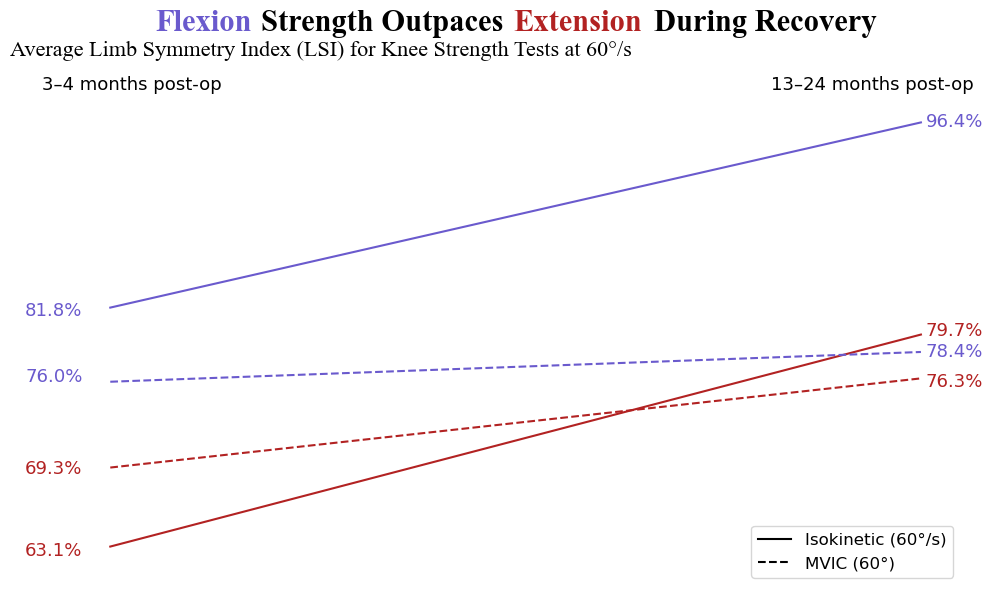

In [34]:
fig, ax = plt.subplots(figsize=(10, 6))

#graph slopes 
ax.plot(acl_grouped['tss_dashboard'], acl_grouped['mean_ext_isok'], linestyle='-', color='firebrick', label='Extension Isokinetic')
ax.plot(acl_grouped['tss_dashboard'], acl_grouped['mean_flex_isok'], linestyle='-', color='slateblue', label='Flexion Isokinetic')
ax.plot(acl_grouped['tss_dashboard'], acl_grouped['mean_flex_mvic'], linestyle='--', color='slateblue', label='Flexion MVIC')
ax.plot(acl_grouped['tss_dashboard'], acl_grouped['mean_ext_mvic_60'], linestyle='--', color='firebrick', label='Extension MVIC')

#remove unnecessary scaffolding
ax.set_ylim(60, 100)
ax.set_yticks([])
ax.set_ylabel('')
ax.set_xticks([])
ax.set_xlabel('')
sns.despine(top=True, right=True, left=True, bottom=True)

#add a legend for line type
custom_legend = [
    Line2D([0], [0], color='black', linestyle='-', label='Isokinetic (60°/s)'),
    Line2D([0], [0], color='black', linestyle='--', label='MVIC (60°)')
]
ax.legend(handles=custom_legend, loc='lower right', fontsize=12)

#add color coded title (with degrees)
plt.text(0.15, 1.13, 'Flexion', ha='center', va='top', fontsize=22, color='slateblue', font='Times New Roman', fontweight='bold', transform=ax.transAxes)
plt.text(0.35, 1.13, 'Strength Outpaces', ha='center', va='top', fontsize=22, font='Times New Roman', fontweight='bold', transform=ax.transAxes)
plt.text(0.57, 1.13, 'Extension', ha='center', va='top', fontsize=22, color='firebrick', font='Times New Roman', fontweight='bold', transform=ax.transAxes)
plt.text(0.78, 1.13, 'During Recovery', ha='center', va='top', fontsize=22, font='Times New Roman', fontweight='bold', transform=ax.transAxes)

#add a subtitle
plt.text(-0.067, 1.07, 'Average Limb Symmetry Index (LSI) for Knee Strength Tests at 60°/s', 
         ha='left', va='top', fontsize=16, font='Times New Roman', transform=ax.transAxes)

#label the lines
plt.text(-0.05, 0.53, '81.8%', color='slateblue', fontsize=13, transform=ax.transAxes)
plt.text(0.96, 0.9, '96.4%', color='slateblue', fontsize=13, transform=ax.transAxes)

plt.text(-0.05, 0.4, '76.0%', color='slateblue', fontsize=13, transform=ax.transAxes)
plt.text(0.96, 0.45, '78.4%', color='slateblue', fontsize=13, transform=ax.transAxes)

plt.text(-0.05, 0.06, '63.1%', color='firebrick', fontsize=13, transform=ax.transAxes)
plt.text(0.96, 0.49, '79.7%', color='firebrick', fontsize=13, transform=ax.transAxes)

plt.text(-0.05, 0.22, '69.3%', color='firebrick', fontsize=13, transform=ax.transAxes)
plt.text(0.96, 0.39, '76.3%', color='firebrick', fontsize=13, transform=ax.transAxes)

#label axes
plt.text(0.07, 1, "3–4 months post-op", ha='center', va='top', fontsize=13, transform=ax.transAxes)
plt.text(0.9, 1, "13–24 months post-op", ha='center', va='top', fontsize=13, transform=ax.transAxes)
plt.tight_layout()


#### see the relationship between flexion strength and psychological readiness & isokinetic strength and psychological readiness

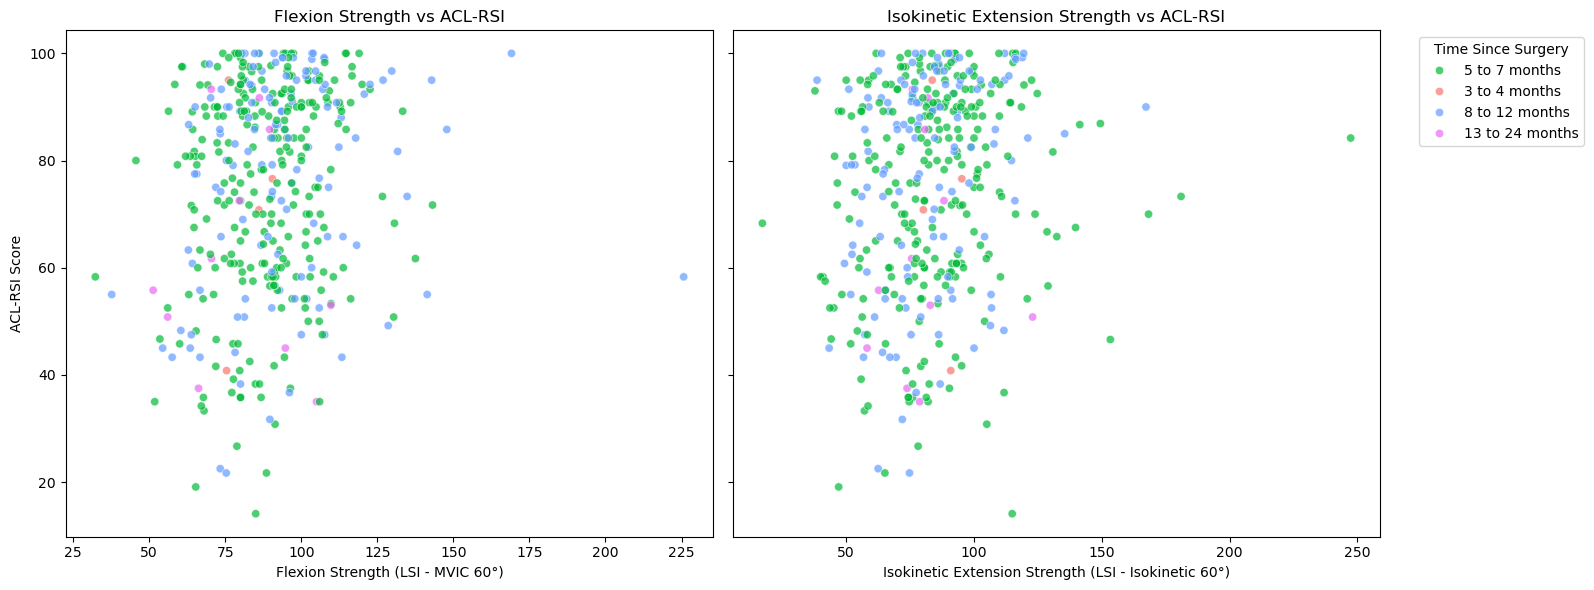

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter and clean the data
df_clean = aclr[['tss_dashboard', 'lsi_flex_mvic_60', 'lsi_ext_isok_60', 'acl_rsi']].dropna()
df_clean = df_clean[df_clean['tss_dashboard'] != 'Not Reported']

# Define a consistent order and color palette
hue_order = ['3 to 4 months', '5 to 7 months', '8 to 12 months', '13 to 24 months']
palette = {
    '3 to 4 months': '#F8766D',
    '5 to 7 months': '#00BA38',
    '8 to 12 months': '#619CFF',
    '13 to 24 months': '#E76BF3'
}

# Set up subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Flexion Strength Plot
sns.scatterplot(
    data=df_clean,
    x='lsi_flex_mvic_60',
    y='acl_rsi',
    hue='tss_dashboard',
    palette=palette,
    alpha=0.7,
    edgecolor='w',
    linewidth=0.5,
    ax=axes[0]
)
axes[0].set_title("Flexion Strength vs ACL-RSI")
axes[0].set_xlabel("Flexion Strength (LSI - MVIC 60°)")
axes[0].set_ylabel("ACL-RSI Score")

# Extension Strength Plot
sns.scatterplot(
    data=df_clean,
    x='lsi_ext_isok_60',
    y='acl_rsi',
    hue='tss_dashboard',
    palette=palette,
    alpha=0.7,
    edgecolor='w',
    linewidth=0.5,
    ax=axes[1]
)
axes[1].set_title("Isokinetic Extension Strength vs ACL-RSI")
axes[1].set_xlabel("Isokinetic Extension Strength (LSI - Isokinetic 60°)")
axes[1].set_ylabel("")

# Adjust layout and legend
axes[1].legend(title="Time Since Surgery", bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0].legend_.remove()  # remove the left legend to avoid duplication
plt.tight_layout()
plt.show()
